 # 1. 퍼셉트론에서 신경망으로
 
 신경망을 그림으로 나타내면 아래와 같다. 총 3개의 층으로 나타낼 수 있다.

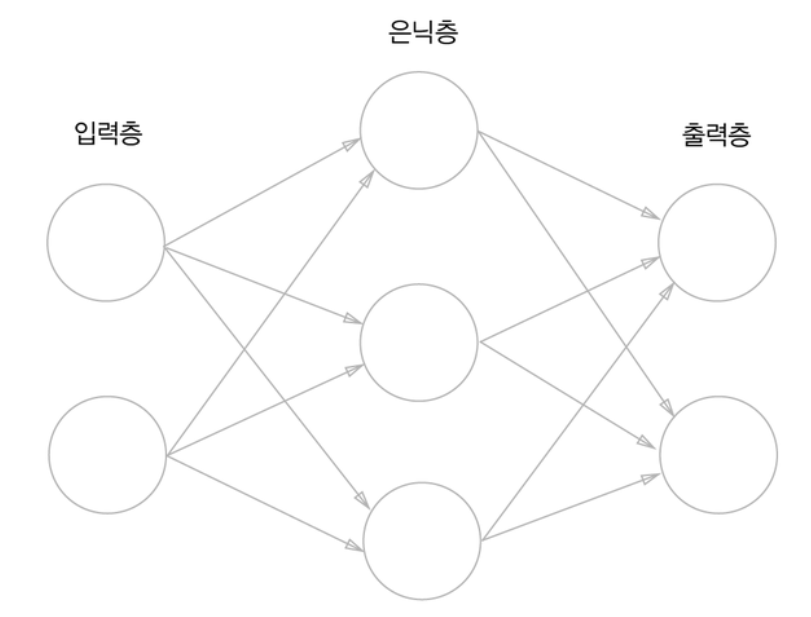

 # 2. 활성화 함수
 
 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화함수라 한다. 일반적으로 퍼셉트론에서는 활성화 함수로 계단 함수(어떤 임계치를 기준으로 0과 1이 나뉨)을 사용한다. 하지만 계단 함수 이외의 함수는 무엇이 있는지 알아보자

 - 계단 함수

In [3]:
# 계단 함수 구현하기
# 아래 함수에서 x는 실수 값만을 받음 (numpy 배열값은 불가)
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0


In [5]:
# 넘파이 배열 지원
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [7]:
y = x > 0
y # y는 bool 배열 따라서 0과 1로 표현
y = y.astype(np.int)
y

array([0, 1, 1])

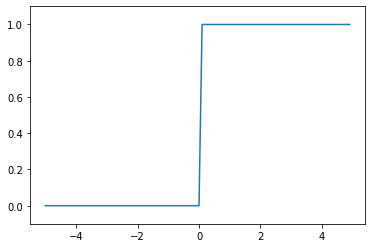

In [10]:
# 계단 함수의 그래프
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0,5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y 축의 범위 지정
plt.show()

 - 시그모이드 함수
 
 시그모이드 함수는 모든 값을 0~1사이의 결과를 출력한다
 
 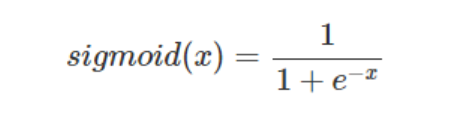

In [ ]:
# 시그모이드 함수 구현하기
